In [5]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt 


In [2]:
def image_caption_generator(hdf_file):
    """
    Generator to yield image_s1, image_s2, and language from HDF5 file.
    """
    with h5py.File(hdf_file, 'r') as f:
        image_s1 = f['image_s1']
        image_s2 = f['image_s2']
        language = f['language']
        
        # Get the total number of samples
        num_samples = len(image_s1)
        
        for idx in range(num_samples):
            img1 = image_s1[idx]
            img2 = image_s2[idx]
            caption = language[idx].decode('ascii')  # Adjust if using utf-8
            
            yield img1, img2, caption

gen = image_caption_generator('scratch/image_pairs_with_captions.hdf5')

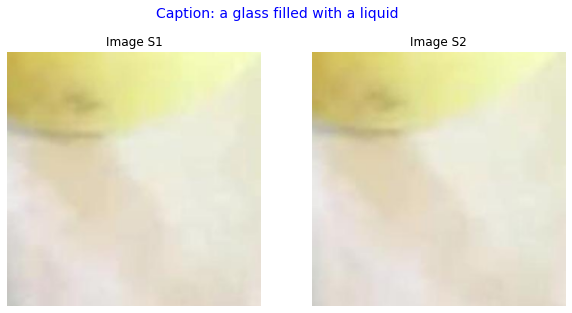

In [25]:
img1, img2, caption = next(gen)
# Show the images and caption
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Caption: {caption}", fontsize=14, color='blue')

# Display image_s1
axes[0].imshow(img1)
axes[0].axis('off')
axes[0].set_title('Image S1')

# Display image_s2
axes[1].imshow(img2)
axes[1].axis('off')
axes[1].set_title('Image S2')

plt.show()